# **Importing the dependencies**

In [ ]:
# Import necessary librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset to Pandas Dataframe
dataset =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance.csv')

In [ ]:
# Printing the first 5 rows of the dataframe
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Number of rows and columns
dataset.shape

(1338, 7)

In [ ]:
# To understand the structure
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Statistical measures for numerical features
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
# Statistical measures for categorical features
dataset.describe(include = 'object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [ ]:
# Number of missing values in each column
dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# **Univariate Analysis**

In [ ]:
# Define a color palette
my_palette = sns.color_palette("viridis", n_colors=5)

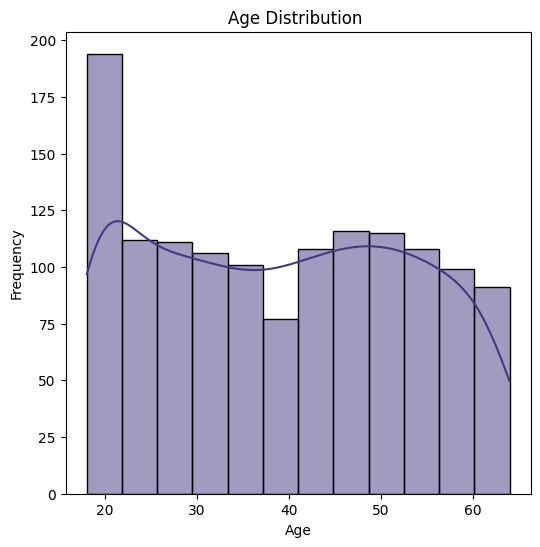

In [ ]:
# Visualizing the Age Distribution with Histogram and KDE

plt.figure(figsize=(6, 6))
sns.histplot(dataset['age'], kde=True, color=my_palette[0])  # Create histogram with kernel density estimate
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution ')
plt.show()

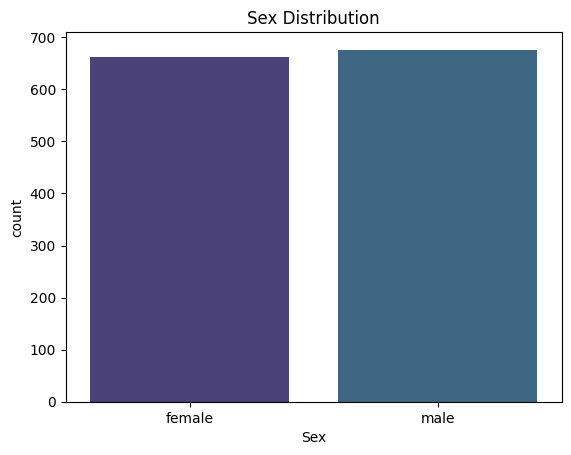

In [ ]:
# Visualizing the Gender Distribution with a Count Plot

sns.countplot(x='sex', data=dataset, palette=my_palette)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('count')
plt.show()

In [ ]:
dataset['sex'].value_counts()

,count
sex,
male,676
female,662


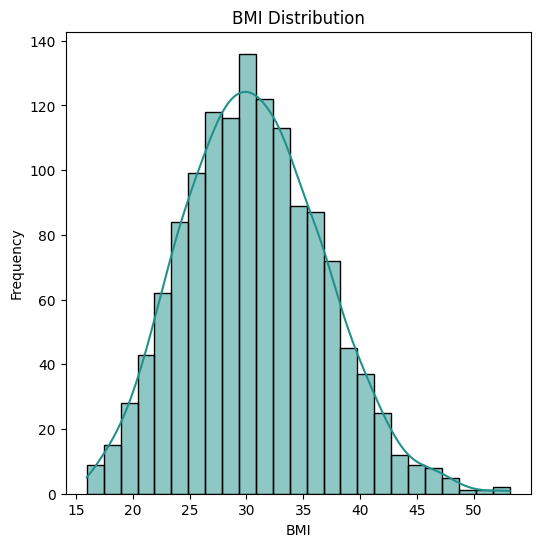

In [ ]:
# Visualizing the BMI Distribution with Histogram and KDE

plt.figure(figsize=(6, 6))
sns.histplot(dataset['bmi'], kde=True, color=my_palette[2])
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

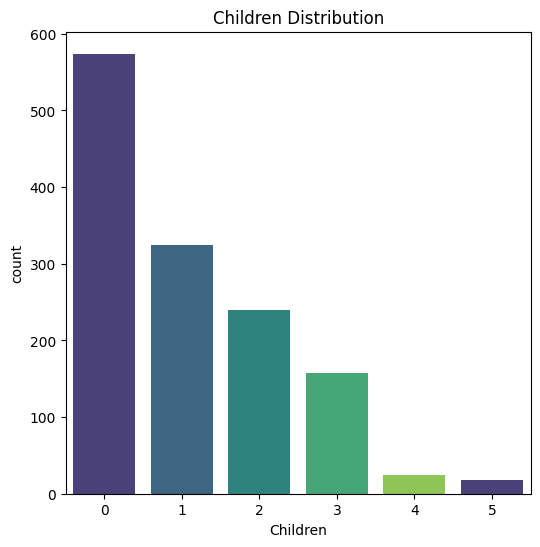

In [ ]:
# Distribution of number of Children in the Dataset

plt.figure(figsize=(6,6))
sns.countplot(x='children', data=dataset, palette=my_palette)
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('count')
plt.show()

In [ ]:
dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


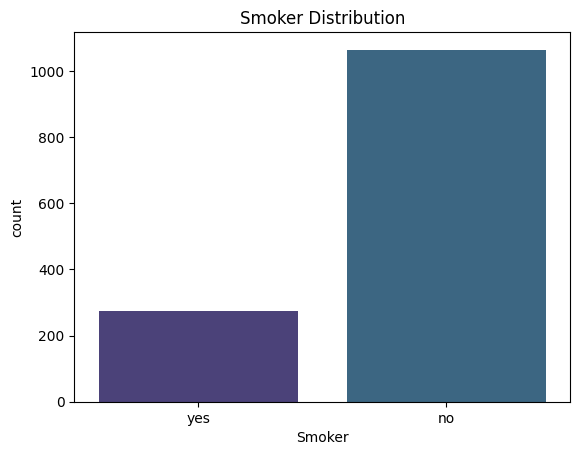

In [ ]:
# Distribution of Smokers in the Dataset

sns.countplot(x='smoker', data=dataset, palette=my_palette)
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('count')
plt.show()

In [ ]:
dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


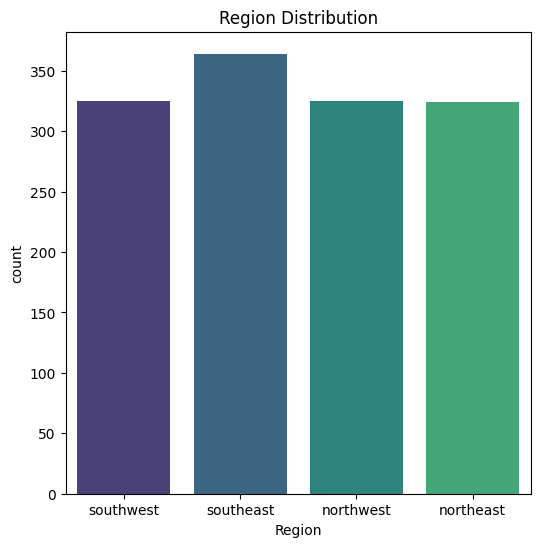

In [ ]:
# Distribution of Regions in the Dataset

plt.figure(figsize=(6,6))
sns.countplot(x='region', data=dataset, palette=my_palette)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('count')
plt.show()

In [ ]:
dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


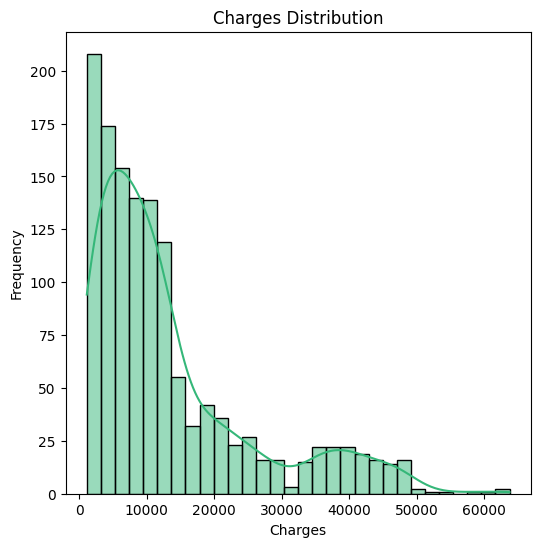

In [ ]:
# Visualizing the Distribution of Charges with Histogram and KDE

plt.figure(figsize=(6, 6))
sns.histplot(dataset['charges'], kde=True, color=my_palette[3])
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution')
plt.show()

# **Multivariate Analysis**

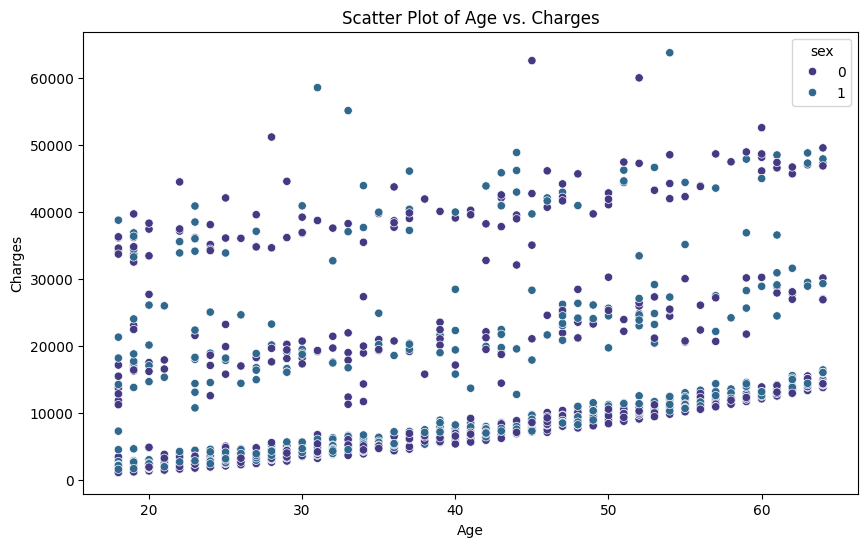

In [ ]:
# Scatter Plot of Age vs. Charges by Sex

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=dataset, hue='sex', palette=my_palette)
plt.title('Scatter Plot of Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

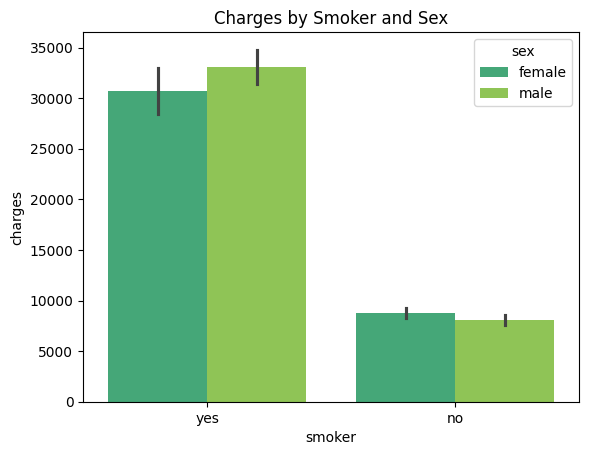

In [ ]:
# Charges by Smoker Status and Sex

sns.barplot(x='smoker', y='charges', hue='sex', data=dataset, palette=[my_palette[3], my_palette[4]])
plt.title('Charges by Smoker and Sex')
plt.show()

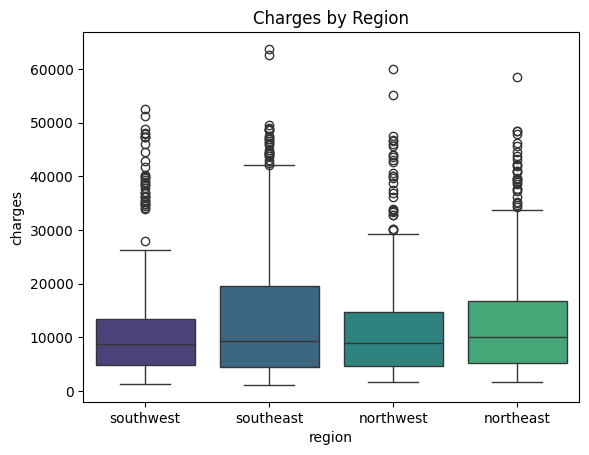

In [ ]:
# Charges by Region

sns.boxplot(x='region', y='charges', data=dataset, palette=my_palette)
plt.title('Charges by Region')
plt.show()

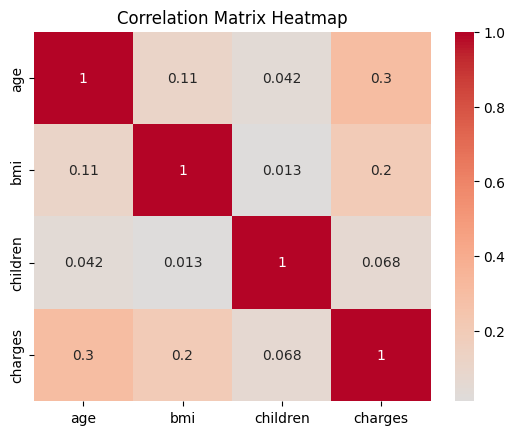

In [ ]:
# Correlation Matrix Heatmap of Age, BMI, Children, and Charges

correlation_matrix = dataset[['age', 'bmi', 'children', 'charges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Data Preprocessing**

In [ ]:
# Encode the categorical columns

dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [ ]:
# Splitting the dataset into features and target

x = dataset.drop(columns='charges', axis=1)
y = dataset['charges']

In [ ]:
# Splitting the dataset into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# **Model Training**

In [ ]:
# Loading Linear regression model
regressor = LinearRegression()

In [ ]:
# Training the Model with the Training Data
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the testing set
y_pred = regressor.predict(x_test)

# **Model Evalaution**

In [ ]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.7447273869684076


In [ ]:
# Building a predictive system

input_data = (31,1,25.74,0,1,0)

# changing input_data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance charge is usd', round(prediction[0],2))

[3760.0805765]
The insurance charge is usd 3760.08
